In [ ]:
import os
import tensorflow as tf

In [ ]:
import tensorflow_text as text

In [ ]:
import shutil
import pandas as pd
import numpy as np
import tweepy
import string
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import classification_report

In [ ]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 24.3 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 352 kB 52.2 MB/s 
     |████████████████████████████████| 1.3 MB 15.1 MB/s 
     |████████████████████████████████| 118 kB 54.9 MB/s 
     |████████████████████████████████| 5.8 MB 19.4 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 238 kB 14.0 MB/s 
     |████████████████████████████████| 588.3 MB 7.2 kB/s 
     |████████████████████████████████| 5.9 MB 48.7 MB/s 
     |████████████████████████████████| 578.1 MB 28 kB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 4.6 MB 56.8 MB/s 


In [ ]:
from official.nlp import optimization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
train_path = "/content/drive/MyDrive/BTP_2022/dataset2/Constraint_Train.csv"
test_path = "/content/drive/MyDrive/BTP_2022/dataset2/Constraint_Test.csv"
val_path = "/content/drive/MyDrive/BTP_2022/dataset2/Constraint_Val.csv"
train_data = pd.read_csv(train_path )
test_data = pd.read_csv(test_path )
val_data = pd.read_csv(val_path)
train_data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


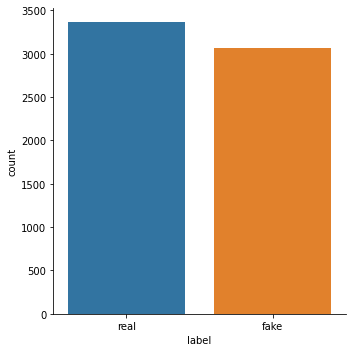

In [ ]:
# plt.bar(x='Label', y='Count', data=train_data,height=4)
sns.catplot(x='label',
            data=train_data,
            kind='count')
plt.show()

In [ ]:
train_data.shape

(6420, 3)

In [ ]:
i=0
for sent in train_data['tweet']:
  # sent = sent.translate(str.maketrans('','',string.punctuation))
  # sent = sent.lower()
  train_data['tweet'][i] = sent
  if(train_data['label'][i]=="real"):
    train_data['label'][i] = 1
  else:
    train_data['label'][i] = 0
  i+=1
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [ ]:
# no run
train_data = pd.DataFrame({
    'id':range(len(train_data)),
    'label':train_data['label'],
    'alpha':['a']*train_data.shape[0],
    'text': train_data['tweet']
})
train_data

,id,label,alpha,text
0,0,1,a,the cdc currently reports 99031 deaths. in gen...
1,1,1,a,states reported 1121 deaths a small rise from ...
2,2,0,a,politically correct woman (almost) uses pandem...
3,3,1,a,#indiafightscorona: we have 1524 #covid testin...
4,4,1,a,populous states can generate large case counts...
...,...,...,...,...
6415,6415,0,a,a tiger tested positive for covid-19 please st...
6416,6416,0,a,???autopsies prove that covid-19 is??� a blood...
6417,6417,0,a,_a post claims a covid-19 vaccine has already ...
6418,6418,0,a,aamir khan donate 250 cr. in pm relief cares fund


In [ ]:
# train_data.to_csv('/content/drive/MyDrive/BTP_2022/dataset2/train.tsv', sep='\t', index=False)
train_data.to_csv('/content/drive/MyDrive/BTP_2022/dataset2/train_std.tsv', sep='\t', index=False)

In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/BTP_2022/dataset2/train.tsv', sep='\t')
i=0
for sent in val_data['tweet']:
  # sent = sent.translate(str.maketrans('','',string.punctuation))
  # sent = sent.lower()
  val_data['tweet'][i] = sent
  if(val_data['label'][i]=="real"):
    val_data['label'][i] = 1
  else:
    val_data['label'][i] = 0
  i+=1
val_data = pd.DataFrame({
    'id':range(len(val_data)),
    'label':val_data['label'],
    'tweet': val_data['tweet']
})
val_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label,tweet
0,0,0,Chinese converting to Islam after realising th...
1,1,0,11 out of 13 people (from the Diamond Princess...
2,2,0,"COVID-19 Is Caused By A Bacterium, Not Virus A..."
3,3,0,Mike Pence in RNC speech praises Donald Trump’...
4,4,1,6/10 Sky's @EdConwaySky explains the latest #C...


In [ ]:
# val_data.to_csv('/content/drive/MyDrive/BTP_2022/dataset2/val.tsv', sep='\t', index=False)
val_data.to_csv('/content/drive/MyDrive/BTP_2022/dataset2/val_std.tsv', sep='\t', index=False)

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.76262903  0.99280983 -0.18611853  0.3667385   0.15233739  0.6550446
  0.9681154  -0.9486271   0.00216157 -0.9877732   0.06842728 -0.97630596]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946295  0.34321263  0.33231527 ...  0.2130087   0.71020836
  -0.05771071]
 [-0.2874208   0.31981027 -0.23018518 ...  0.5845508  -0.21329744
   0.7269212 ]
 [-0.66157013  0.6887687  -0.8743292  ...  0.10877226 -0.26173285
   0.47855547]
 ...
 [-0.22561097 -0.2892568  -0.07064426 ...  0.47566074  0.83277184
   0.40025318]
 [-0.29824227 -0.27473107 -0.05450526 ...  0.488498    1.0955358
   0.18163362]
 [-0.4437815   0.00930744  0.07223801 ...  0.17290124  1.1833242
   0.07898009]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.6060215]], shape=(1, 1), dtype=float32)


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess_model(text_input)
outputs = bert_model(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/BTP_2022/dataset2/train.tsv', sep='\t')
df_train.head()

,id,tweet,label
0,1,the cdc currently reports 99031 deaths. in gen...,1
1,2,states reported 1121 deaths a small rise from ...,1
2,3,politically correct woman (almost) uses pandem...,0
3,4,#indiafightscorona: we have 1524 #covid testin...,1
4,5,populous states can generate large case counts...,1


In [ ]:
X_train = df_train['tweet']
y_train = df_train['label']

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size = 60)

Epoch 1/5
107/107 [==============================] - 28s 237ms/step - loss: 0.5308 - accuracy: 0.7444
Epoch 2/5
107/107 [==============================] - 26s 245ms/step - loss: 0.3885 - accuracy: 0.8305
Epoch 3/5
107/107 [==============================] - 29s 268ms/step - loss: 0.3517 - accuracy: 0.8519
Epoch 4/5
107/107 [==============================] - 26s 240ms/step - loss: 0.3264 - accuracy: 0.8579
Epoch 5/5
107/107 [==============================] - 26s 242ms/step - loss: 0.3156 - accuracy: 0.8607


dict_keys(['loss', 'accuracy'])


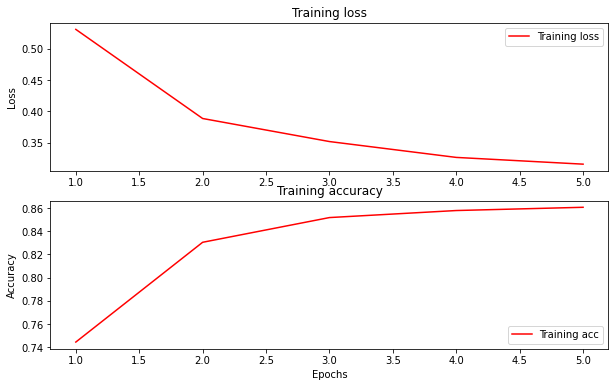

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
# val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
# val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(211)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.title('Training loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(212)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/BTP_2022/dataset2/val.tsv', sep='\t')
X_val = df_val['tweet']
y_val = df_val['label']

In [ ]:
score=0
y_predicted = model.predict(X_val)
y_predicted = y_predicted.flatten()
for i in range(len(y_predicted)):

  if(y_predicted[i]>0.5):
    x=1
  else:
    x=0
  if(y_val[i]==x):
    score+=1
print(score/21.4)

67/67 [==============================] - 7s 94ms/step
87.38317757009347


In [ ]:
model_small = load_model("/content/drive/MyDrive/BTP_2022/bert_small.h5" ,custom_objects={'KerasLayer': hub.KerasLayer} )

In [ ]:
# loss, accuracy = model_small.evaluate(X_val, y_val, verbose=0)
y_pred = model_small.predict(X_val)
y_pred = y_pred.flatten()
tp =0
fp =0
tn =0
fn=0
for i in range(len(y_pred)):

  if(y_pred[i]>0.5):
    if(y_val[i]==0):
      fp+=1
    else:
      tp+=1
  else:
    if(y_val[i]==0):
      tn+=1
    else:
      fn+=1
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f1_score = (2*recall*precision)/(recall+precision)


print(recall)
print(precision)
print(accuracy)
print(f1_score)

67/67 [==============================] - 7s 101ms/step
0.9428571428571428
0.832807570977918
0.8710280373831776
0.8844221105527639


In [ ]:
model_std = load_model("/content/drive/MyDrive/BTP_2022/bert_std.h5" ,custom_objects={'KerasLayer': hub.KerasLayer} )

In [ ]:
y_pred = model_std.predict(X_val)
y_pred = y_pred.flatten()
tp =0
fp =0
tn =0
fn=0
for i in range(len(y_pred)):

  if(y_pred[i]>0.5):
    if(y_val[i]==0):
      fp+=1
    else:
      tp+=1
  else:
    if(y_val[i]==0):
      tn+=1
    else:
      fn+=1
recall = tp/(tp+fn)
precision = tp/(tp+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f1_score = (2*recall*precision)/(recall+precision)


print(recall)
print(precision)
print(accuracy)
print(f1_score)

67/67 [==============================] - 24s 358ms/step
0.9526785714285714
0.7874538745387454
0.8406542056074766
0.8622222222222221


In [ ]:
print(loss)
print(accuracy)

0.300783634185791
0.8710280656814575


In [ ]:
i = 53
print(X_val[i])
print("corresponding output probability is: ")
print(y_predicted[i])

italian doctor accuse who of misleading the world about covid-19 as covid-19 is caused by bacteria not virus.
corresponding output probability is: 
0.0017034585


In [ ]:
i = 80
print(X_val[i])
print("Corresponding Output Probability is: ")
print(y_predicted[i])

muslims are hoarding food that is distributed in the lockdown.
corresponding output probability is: 
0.049014837


In [ ]:
i=242
print(X_val[i])
print("corresponding output probability is: ")
print(y_predicted[i])

a good news* finally an indian student from pondicherry university, named ramu found a home remedy cure for covid-19 which is for the very first time accepted by who. he proved that by adding 1 tablespoon of black pepper powder to 2 table spoons of honey and some ginger juice for consecutive 5 days would suppress the effects of corona. and eventually go away 100%. - entire world is starting to accept this remedy. finally a good news in 2020!! please circulate this information to all your family members and friends.
corresponding output probability is: 
0.56251585


In [ ]:
i=273
print(X_val[i])
print("corresponding output probability is: ")
print(y_predicted[i])

in india there are 3 #covid19vaccine trials are underway. the dcgi has permitted serum institute of india (sii) to conduct phase 3 trial of the vaccine developed by the oxford university in india. https://t.co/bqcemtudbv
corresponding output probability is: 
0.81785786


In [ ]:
model.save("/content/drive/MyDrive/BTP_2022/bert_small.h5")

In [ ]:
status = api.get_status(train_data['tweet_id'][2607])
print(status.text)

"In Scotland, a single dose of Pfizer’s vaccine was 85 per cent effective at reducing COVID-19 hospitalisations; As… https://t.co/ltKMGDAxhi


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/BTP_2022/dataset2/train_std.tsv', sep='\t')
X_train = df_train['tweet']
y_train = df_train['label']
df_val = pd.read_csv('/content/drive/MyDrive/BTP_2022/dataset2/val_std.tsv', sep='\t')
X_val = df_val['tweet']
y_val = df_val['label']

In [ ]:
std_bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
}

tfhub_handle_encoder = map_name_to_handle[std_bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[std_bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
std_bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
std_bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = std_bert_preprocess_model(text_input)
outputs = std_bert_model(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model_std = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model_std.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_std.fit(X_train, y_train, epochs=5, batch_size = 40)

Epoch 1/5
161/161 [==============================] - 69s 418ms/step - loss: 0.6156 - accuracy: 0.6567
Epoch 2/5
161/161 [==============================] - 66s 412ms/step - loss: 0.5031 - accuracy: 0.7671
Epoch 3/5
161/161 [==============================] - 67s 415ms/step - loss: 0.4597 - accuracy: 0.7960
Epoch 4/5
161/161 [==============================] - 67s 418ms/step - loss: 0.4295 - accuracy: 0.8160
Epoch 5/5
161/161 [==============================] - 67s 416ms/step - loss: 0.4064 - accuracy: 0.8276


In [ ]:
# val checker
score=0
y_predicted = model_std.predict(X_val)
y_predicted = y_predicted.flatten()
for i in range(len(y_predicted)):
  if(y_predicted[i]>0.5):
    x=1
  else:
    x=0
  if(y_val[i]==x):
    score+=1
print(score/21.4)

67/67 [==============================] - 23s 328ms/step
84.06542056074767


In [ ]:
model_std.save("/content/drive/MyDrive/BTP_2022/bert_std.h5")